In [1]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Add the path to the electre_tree module to the Python path
sys.path.append(os.path.join(cwd, 'ELECTRE_Tree'))

from electre_tree import tree_e_tri_b , util_e_tri_b

In [2]:
# Required Libraries
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/project/data_normalized.csv')
df.head(3)


,Storefront,Visible Sign of Business,Business WiFi,Business tables,Business Plugs,Business Internal CCTV,External CCTV,Number of female employees,Accepts credit card,Incline,...,Deaths,Injuries,Run over,Metro,Metrobus,Trolleybus,RTP,Concessioned,e-bike,Total coverage of transport
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.333333,...,0.333333,0.866667,0.0,1.0,1.0,0.0,1.0,1.0,0.5,0.4
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.2,0.75,1.000000,...,1.000000,1.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.000000,...,1.000000,1.000000,1.0,1.0,1.0,0.0,0.5,1.0,1.0,0.4


In [4]:
# Convert to array format

arr = df.values
arr

array([[0.        , 0.        , 0.        , ..., 1.        , 0.5       ,
        0.4       ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.6       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.4       ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.66666667,
        0.2       ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.5       ,
        0.        ]])

In [85]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
target    = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 10

# Parameters - GA
elite       = 20
eta         = 1
mu          = 10
size        = 100
rate        = 0.1
generations = 150
samples     = 0.25

In [86]:
# Train Model
models = tree_e_tri_b.tree_electre_tri_b(arr, 
                                         target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


In [87]:
prediction, solutions = tree_e_tri_b.predict(models, arr, verbose = False, rule = 'pc')

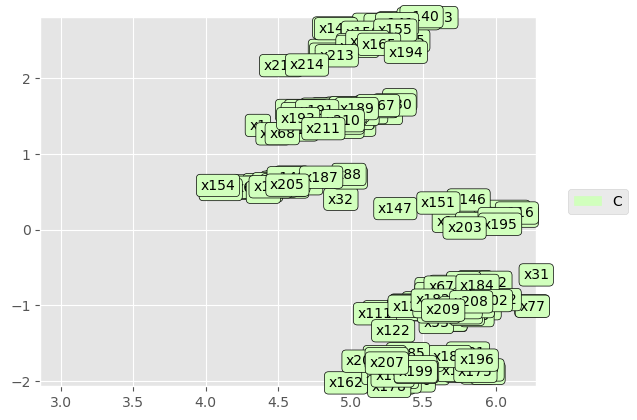

In [88]:
# Plot - Tree Model
util_e_tri_b.plot_points(arr, prediction)

In [89]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes)

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
    print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
    print('Lambda Cutoff: ', round(cut_mean,  2))
    print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.41 0.34 0.71 0.61 0.43 0.48 0.52 0.65 0.54 0.49 0.65 0.49 0.54 0.64
 0.35 0.63 0.71 0.61 0.59 0.27 0.49 0.54 0.62 0.86 0.39 0.14 0.57 0.61
 0.43 0.55 0.63 0.41 0.43 0.43 0.42 0.59 0.46 0.39 0.63 0.5  0.69 0.47
 0.32 0.53 0.65 0.5  0.25 0.56 0.46 0.65 0.58 0.63 0.61 0.52 0.42 0.65
 0.33 0.4  0.5  0.46 0.49 0.58 0.63 0.19 0.57 0.5  0.23 0.26 0.51 0.64
 0.41 0.48 0.7  0.45 0.43 0.55]
Q:  [0.28 0.15 0.17 0.19 0.18 0.32 0.23 0.32 0.37 0.07 0.23 0.48 0.37 0.2
 0.22 0.3  0.22 0.14 0.12 0.19 0.27 0.3  0.3  0.29 0.15 0.3  0.24 0.4
 0.25 0.13 0.22 0.2  0.33 0.13 0.17 0.23 0.14 0.03 0.13 0.06 0.24 0.12
 0.1  0.15 0.15 0.26 0.17 0.29 0.26 0.06 0.36 0.09 0.33 0.16 0.06 0.18
 0.24 0.15 0.27 0.34 0.14 0.26 0.2  0.3  0.29 0.21 0.2  0.08 0.23 0.
 0.29 0.23 0.33 0.   0.15 0.31]
P:  [0.32 0.28 0.24 0.35 0.22 0.4  0.3  0.35 0.39 0.39 0.32 0.58 0.44 0.2
 0.27 0.38 0.27 0.25 0.12 0.32 0.47 0.32 0.38 0.37 0.16 0.37 0.34 0.49
 0.37 0.27 0.23 0.26 0.48 0.19 0.32 0.34 0.21 0.03 0.24 0.11 0

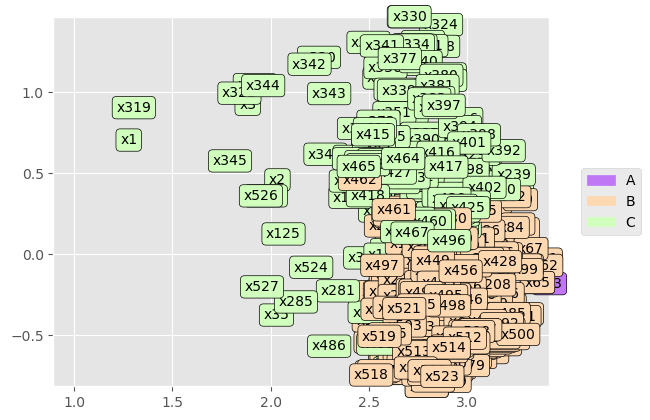

In [106]:
# Plot - Elicitated Parameters
e_tri = util_e_tri_b.electre_tri_b(arr, W = w_mean, Q = q_mean, P = p_mean, V = v_mean,
                                   B = b_mean, cut_level = cut_mean, verbose = False, rule = rule, graph = True) 

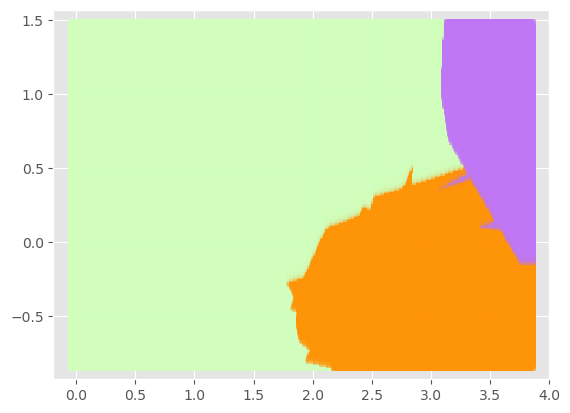

In [107]:
# Plot Tree Model - Decision Boundaries
tree_e_tri_b.plot_decision_boundaries(arr, models)  

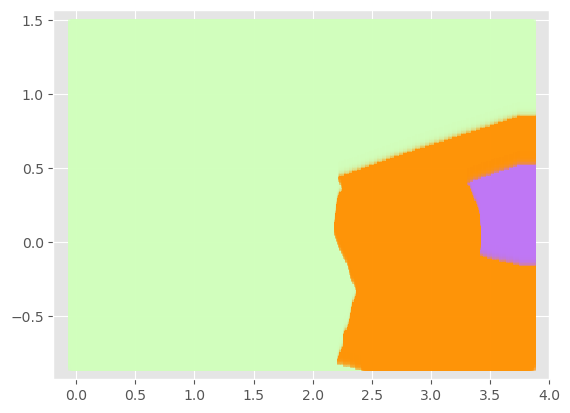

In [108]:
# Plot Mean Model - Decision Boundaries  
model_mean = []
model_mean.append([w_mean, acc_mean, [], [], [], b_mean, cut_mean, [], [], q_mean, p_mean, v_mean])
tree_e_tri_b.plot_decision_boundaries(arr, model_mean)